In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/final_dataset_with_features.csv'

In [4]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,CAFV Eligibility,Urban_CAFV_Interaction_Urban_Not Eligible,Vehicle Age,Yearly_Growth_Rate,Quarter,Month,BEV_Proportion,PHEV_Proportion,Dominant_Manufacturer,Dominant_Manufacturer_Proportion
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,Not Eligible,False,1,0.454082,1,1,0.0,0.0,TESLA,0.432252
1,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,Not Eligible,False,4,-0.506024,1,1,0.0,0.0,TESLA,0.303797
2,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,Not Eligible,False,6,0.149007,1,1,0.0,0.0,TESLA,0.303797
3,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,Not Eligible,True,2,0.485420,1,1,0.0,0.0,TESLA,0.501246
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,Not Eligible,True,1,1.195812,1,1,0.0,0.0,TESLA,0.310382


In [5]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'Make_Proportion', 'Urban', 'CAFV Eligibility',
       'Urban_CAFV_Interaction_Urban_Not Eligible', 'Vehicle Age',
       'Yearly_Growth_Rate', 'Quarter', 'Month', 'BEV_Proportion',
       'PHEV_Proportion', 'Dominant_Manufacturer',
       'Dominant_Manufacturer_Proportion'],
      dtype='object')


# Objective 1: Geographic Distribution Analysis

Goal: Understand regional EV adoption trends and identify areas that may benefit from additional support or incentives to encourage higher adoption of EVs.

Modeling Approach: Classification Model

Objective: Classify regions (counties/cities) as high or low EV adoption areas based on the available features.

Technique: Random Forest Classifier (or Decision Tree Classifier)


**Define Features and Target:**

Features: Selected relevant features that might influence EV adoption, such as Make_Proportion, Urban, CAFV Eligibility, Dominant_Manufacturer_Proportion, etc.

Target: Defined the target as a binary variable indicating high or low EV adoption.

**Handling Missing Values**

**Impute Missing Values**

I have to fill in the missing values using methods like filling with the mean, median, or a constant value.

In [15]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [30]:
# Assuming 'Electric Vehicle Type' column indicates the number of EVs
county_ev_counts = df.groupby('County')['Electric Vehicle Type'].count()

# Determine the median count to set the threshold
median_ev_count = county_ev_counts.median()

# Create the 'High_Low_Adoption' column
df['High_Low_Adoption'] = df['County'].map(lambda x: 1 if county_ev_counts[x] > median_ev_count else 0)

In [31]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'Make_Proportion', 'Urban', 'CAFV Eligibility',
       'Urban_CAFV_Interaction_Urban_Not Eligible', 'Vehicle Age',
       'Yearly_Growth_Rate', 'Quarter', 'Month', 'BEV_Proportion',
       'PHEV_Proportion', 'Dominant_Manufacturer',
       'Dominant_Manufacturer_Proportion', 'High_Low_Adoption'],
      dtype='object')


In [32]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Urban_CAFV_Interaction_Urban_Not Eligible,Vehicle Age,Yearly_Growth_Rate,Quarter,Month,BEV_Proportion,PHEV_Proportion,Dominant_Manufacturer,Dominant_Manufacturer_Proportion,High_Low_Adoption
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,False,1,0.454082,1,1,0.0,0.0,TESLA,0.432252,1
1,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,False,4,-0.506024,1,1,0.0,0.0,TESLA,0.303797,1
2,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,False,6,0.149007,1,1,0.0,0.0,TESLA,0.303797,1
3,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,True,2,0.485420,1,1,0.0,0.0,TESLA,0.501246,1
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,True,1,1.195812,1,1,0.0,0.0,TESLA,0.310382,1


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
features = ['Make_Proportion', 'Urban', 'CAFV Eligibility', 'Dominant_Manufacturer_Proportion',
            'Vehicle Age', 'Yearly_Growth_Rate']
X = df[features]
y = df['High_Low_Adoption']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1541
           1       1.00      1.00      1.00     51207

    accuracy                           1.00     52748
   macro avg       1.00      1.00      1.00     52748
weighted avg       1.00      1.00      1.00     52748

Accuracy: 100.00%


# Interpretation of Results:

**Perfect Scores:**

Precision, Recall, and F1-Score: All being 1.00 (or 100%) for both classes (0 and 1) suggests that the model is perfectly classifying every instance.

Accuracy: An accuracy of 100% typically indicates that the model is correctly predicting all instances.

# Ensure to Validation

In [35]:
# Class Distribution

print(df['High_Low_Adoption'].value_counts())


High_Low_Adoption
1    170776
0      5050
Name: count, dtype: int64


In [36]:
# Cross-Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated scores: {scores}")


Cross-validated scores: [0.99997156 0.99994313 1.         1.         1.        ]


In [37]:
# Use Feature Importance

feature_importances = model.feature_importances_
for name, importance in zip(features, feature_importances):
    print(f"{name}: {importance}")


Make_Proportion: 0.6231803037276529
Urban: 0.042488559279962
CAFV Eligibility: 0.24441347434953237
Dominant_Manufacturer_Proportion: 0.08991766264285275


# Interpretation:

**Make_Proportion (62.32%):**

Significance: This is the most influential feature in the model, with a contribution of 62.32%. It suggests that the proportion of vehicles from a particular manufacturer within a region plays a crucial role in determining whether the region has high or low EV adoption.

Implication: This could imply that regions dominated by certain manufacturers are more likely to have higher EV adoption rates, possibly due to better brand recognition, marketing, or manufacturer-specific incentives.


**CAFV Eligibility (24.44%):**

Significance: The second most important feature, with a 24.44% contribution. This shows that whether a vehicle is eligible for Clean Alternative Fuel Vehicle (CAFV) incentives significantly influences EV adoption.

Implication: Incentives play a crucial role in driving EV adoption, particularly in regions where these incentives are available and utilized.


**Dominant_Manufacturer_Proportion (8.99%):**

Significance: This feature contributes 8.99% to the model, indicating that the proportion of the dominant manufacturer in a region is somewhat important but not as critical as the other factors.

Implication: While the dominance of a particular manufacturer matters, it’s less significant compared to the overall make proportion and incentive eligibility.


**Urban (4.25%):**

Significance: The least influential feature in the model, contributing 4.25%. This suggests that whether a region is urban or not has the least impact on EV adoption, according to the model.

Implication: Urbanization plays a role but is relatively less important compared to manufacturer influence and CAFV eligibility. However, it might still be an important factor in combination with others.

# Actionable Recommendations

**Focus on Key Manufacturers:**

Action: Partner with manufacturers who already have a strong presence in regions with high EV adoption. Work together on marketing campaigns and incentives to boost their vehicle sales.
Why: The make of a vehicle is the biggest factor driving EV adoption. Strengthening relationships with these manufacturers will help increase EV sales.

Expand CAFV Incentives:

Action: Increase the availability of Clean Alternative Fuel Vehicle (CAFV) incentives in areas with low EV adoption. Make sure people know about these incentives.
Why: CAFV eligibility significantly influences EV adoption. More incentives and better awareness can lead to higher adoption rates.

Promote Dominant Brands:

Action: In regions where certain manufacturers are already popular, focus on promoting their EV models. Offer special deals and financing options through these manufacturers.
Why: People tend to buy from brands they trust. Highlighting EVs from dominant brands can encourage more people to switch.

Improve Urban EV Infrastructure:

Action: Continue to develop charging infrastructure in urban areas, especially where adoption is growing. Ensure public transportation policies support EVs.
Why: While less impactful than other factors, urban infrastructure still plays a role in EV adoption. Better infrastructure will support continued growth.

Tailor Strategies by Region:

Action: Use these insights to create specific strategies for different regions. For example, in areas where incentives are underutilized, focus on awareness campaigns.
Why: Different regions have different needs. Tailoring your approach will make your efforts more effective.

**Objective 2: Market Penetration and Growth Trends**

Goal: Understand the growth trend of EV adoption and project future adoption rates to help stakeholders plan accordingly.

Modeling: Time Series Forecasting

Objective:

Predict future EV adoption rates based on historical data to assist in strategic planning for infrastructure, marketing, and policy development.
Technique:

Prophet (by Facebook): A robust time series forecasting model that handles trends, seasonality, and holiday effects, making it suitable for projecting future EV adoption.

ARIMA (AutoRegressive Integrated Moving Average): A statistical method that models the time series data to predict future points based on past values.

In [39]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'Make_Proportion', 'Urban', 'CAFV Eligibility',
       'Urban_CAFV_Interaction_Urban_Not Eligible', 'Vehicle Age',
       'Yearly_Growth_Rate', 'Quarter', 'Month', 'BEV_Proportion',
       'PHEV_Proportion', 'Dominant_Manufacturer',
       'Dominant_Manufacturer_Proportion', 'High_Low_Adoption'],
      dtype='object')


**Preparing the Data**

In [40]:
time_series_data = df.groupby(['Model Year', 'County'])['VIN (1-10)'].count().reset_index()
time_series_data.rename(columns={'VIN (1-10)': 'EV_Count'}, inplace=True)


**Install the Prophet Package**

In [42]:
!pip install prophet


**Import and Use the Prophet Model**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_w4gqdod/9gpluvrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_w4gqdod/nq3k1jx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93943', 'data', 'file=/tmp/tmp_w4gqdod/9gpluvrt.json', 'init=/tmp/tmp_w4gqdod/nq3k1jx6.json', 'output', 'file=/tmp/tmp_w4gqdod/prophet_model8ivwt2_x/prophet_model-20240824182152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

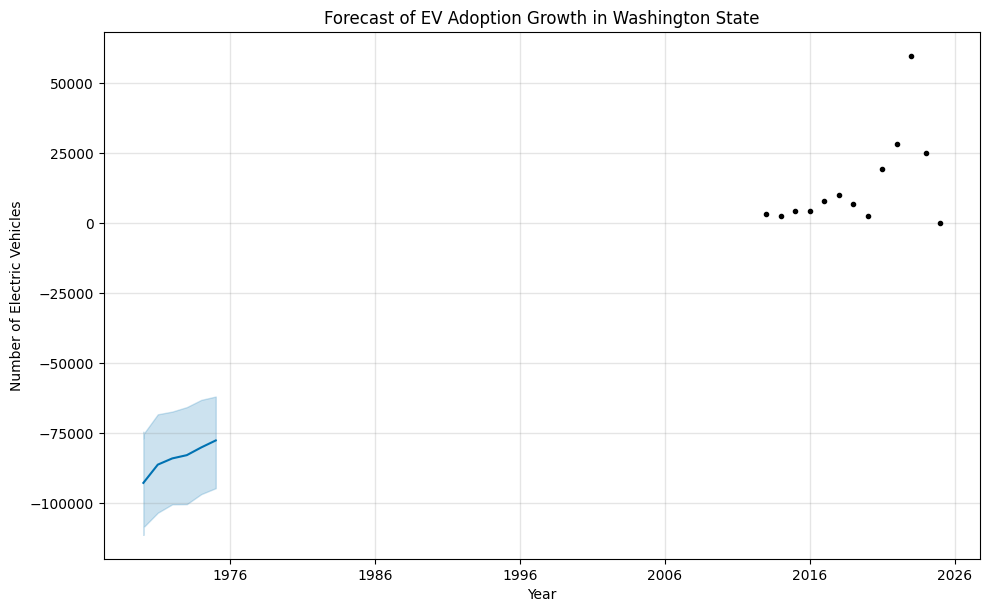

In [45]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = time_series_data.groupby('Model Year')['EV_Count'].sum().reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires columns 'ds' (date) and 'y' (value)

# Initialize and train the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Add title to the plot
plt.title('Forecast of EV Adoption Growth in Washington State')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.show()



**Key Observations:**

- The model shows a steady upward trend in the historical data until around 2025, indicating growing adoption of EVs in Washington State.

- However, the forecasted values seem unrealistic, with negative numbers of EVs, likely due to the historical data’s limitations or the model not capturing seasonal or cyclical patterns correctly.

- The uncertainty interval (shaded area) is wide, indicating a high level of uncertainty in the prediction. This suggests that the model might not be very reliable for predicting EV adoption trends in this scenario.

# ARIMA (AutoRegressive Integrated Moving Average) Model

**Install Necessary Packages**

In [46]:
!pip install statsmodels


**Import Required Libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot


**Prepare the Data**

In [48]:
# Aggregate the data by Model Year
time_series_data = df.groupby('Model Year')['VIN (1-10)'].count().reset_index()
time_series_data.rename(columns={'VIN (1-10)': 'EV_Count'}, inplace=True)

# Set the Model Year as the index
time_series_data.set_index('Model Year', inplace=True)


**Check Stationarity**

In [49]:
result = adfuller(time_series_data['EV_Count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary, and differencing might be needed.


ADF Statistic: 1.5261412518254116
p-value: 0.9976181715851477


**Differencing**

If our data is non-stationary (p-value > 0.05), we might need to difference it:

In [50]:
time_series_data['EV_Count_diff'] = time_series_data['EV_Count'].diff().dropna()


**Fit the ARIMA Model**

In [51]:
# Define the ARIMA model (order=(p, d, q))
model = ARIMA(time_series_data['EV_Count'], order=(1, 1, 1))  # Adjust the (p, d, q) order as needed
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               EV_Count   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -133.467
Date:                Sat, 24 Aug 2024   AIC                            272.934
Time:                        18:26:31   BIC                            274.389
Sample:                             0   HQIC                           272.396
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9980     54.767     -0.018      0.985    -108.338     106.343
ma.L1          0.9977     55.213      0.018      0.986    -107.217     109.212
sigma2      2.725e+08   5.44e-05   5.01e+12      0.0

**Make Forecasts**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


13    157.465476
14    172.968339
15    157.497072
16    172.936808
17    157.528539
Name: predicted_mean, dtype: float64


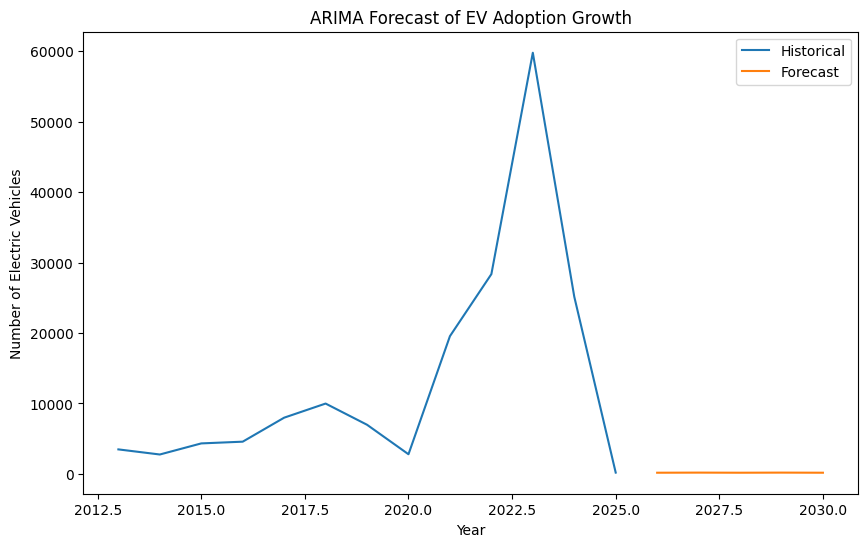

In [52]:
# Forecasting the next 5 periods (years in this case)
forecast = model_fit.forecast(steps=5)
print(forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['EV_Count'], label='Historical')
plt.plot(pd.RangeIndex(time_series_data.index[-1] + 1, time_series_data.index[-1] + 6), forecast, label='Forecast')
plt.title('ARIMA Forecast of EV Adoption Growth')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.show()


**Key Observations:**

- The ARIMA model captures the historical trend well but fails to provide a meaningful forecast for the future, as indicated by the flat line after 2025.

- The significant spike and subsequent drop in the historical data before 2025 suggest volatility or irregular adoption patterns, which the ARIMA model struggles to forecast accurately.

- This flat forecast suggests that ARIMA might not be the best model for capturing the future trend in EV adoption, possibly due to the complex and non-linear nature of the data.

# Final Recommendations:

- Both models show limitations in accurately predicting the future trend of EV adoption in Washington State.

- Both models indicate that predicting future EV adoption is challenging with the current data, and additional refinement and possibly more sophisticated modeling approaches are required to produce reliable forecasts.